# Verification of the V0 dataset

### Goal
In this notebook, we inspect that the V0 dataset has correctly been created.

In [18]:
import os
import sys
sys.path.append('../scripts/')
from gz_datasets import GZDataset
import matplotlib.pyplot as plt
import numpy as np

### Load dataset

In [3]:
dirname = "/home/michael/Workspace/datasets/galaxy_zoo/"
filename = "dataset_v0.json"

path = os.path.join(dirname, filename)
print('Does dataset path exist ?', os.path.exists(path))

Does dataset path exist ? True


In [7]:
dataset_v0 = GZDataset().from_file(path, n_inputs=-1)

print('Dataset length:', len(dataset_v0.dataset))

Dataset length: 98987


### One example of conversation

In [21]:
dataset_v0.dataset[0]['conversations']

[{'from': 'human',
  'value': 'Relay a brief, clear account of the picture shown.'},
 {'from': 'gpt',
  'value': "The image shows a red object and a whitish object at 5 o'clock. The red object is likely a foreground star from our galaxy, while the whitish object is also a local star. The overall image appears to be beautiful. There is a discussion about whether the blue object in the image is an elliptical or a starforming spiral."}]

### Count the number of words generated by GPT for each conversation

In [17]:
n_words = []
for entry in dataset_v0.dataset:
    conversations = entry['conversations'] 
    n_words.append(len(conversations[1]['value'].split(' ')))  # from gpt

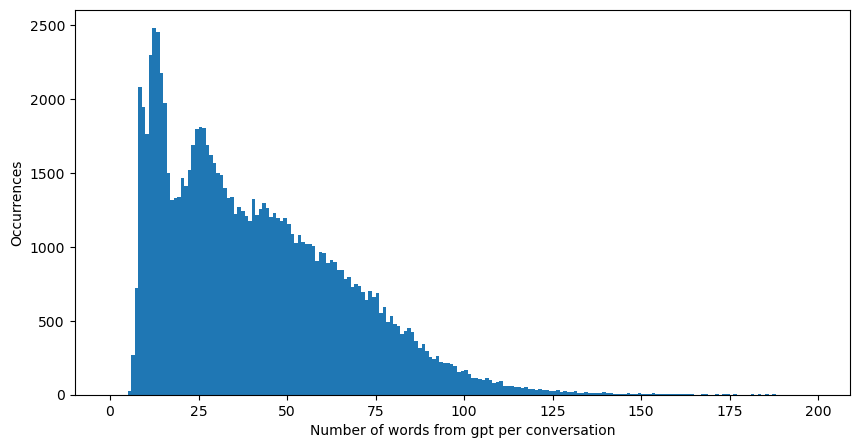

In [22]:
plt.figure(figsize=(10, 5))
plt.hist(n_words, bins=np.arange(200));
plt.xlabel('Number of words from gpt per conversation')
plt.ylabel('Occurrences')
# plt.savefig("/home/michael/Downloads/hist_v0.png")